In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-popular-indian-movies-2023/indian_movies.csv


# Data load

In [40]:
data = pd.read_csv("/kaggle/input/most-popular-indian-movies-2023/indian_movies.csv")

# Basic Data Preprocessing

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19951 entries, 0 to 19950
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              19951 non-null  object 
 1   overview           18277 non-null  object 
 2   original_language  19951 non-null  object 
 3   release_date       18058 non-null  object 
 4   genres             15632 non-null  object 
 5   popularity         19951 non-null  float64
 6   vote_average       19951 non-null  float64
 7   vote_count         19951 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.2+ MB


In [42]:
data.head(10)

,title,overview,original_language,release_date,genres,popularity,vote_average,vote_count
0,RRR,A fictional history of two legendary revolutio...,Telugu,2022-03-24,"Action, Drama",81.050,7.8,1020
1,Rocky Aur Rani Kii Prem Kahaani,"Gym-freak brat Rocky falls in love with Rani, ...",Hindi,2023-07-28,"Comedy, Drama, Family, Romance",36.450,0.0,0
2,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",Hindi,2022-02-04,"Action, Comedy, Crime",32.521,6.1,56
3,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,Hindi,2009-12-23,"Drama, Comedy",30.949,8.0,2119
4,Voice of Sathyanathan,A man is mistakenly suspected of being a threa...,Malayalam,2023-07-28,"Comedy, Drama",28.323,0.0,0
5,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",Hindi,1995-10-20,"Comedy, Drama, Romance",28.244,8.6,4186
6,Bāhubali: The Beginning,The young Shivudu is left as a foundling in a ...,Telugu,2015-07-10,"Action, Adventure, Drama, Fantasy",27.127,7.5,681
7,Lust Stories 2,"Four eminent Indian directors explore sex, des...",Hindi,2023-06-29,"Drama, Romance",26.416,5.4,18
8,Bawaal,"Ajay Dixit, an ordinary history teacher in a h...",Hindi,2023-07-21,"Drama, Romance, Comedy, History",24.939,6.2,10
9,BRO,"After being fatally injured in a car crash, a ...",Telugu,2023-07-27,"Comedy, Drama, Fantasy",24.525,9.0,2


In [43]:
data.shape

(19951, 8)

In [51]:
missing_values = data.isnull().sum()
missing_values

title                   0
overview             1674
original_language       0
release_date         1893
genres               4319
popularity              0
vote_average            0
vote_count              0
dtype: int64

Remove Null Values

In [55]:
data = data.dropna()
data.shape


(14115, 8)

# EDA

new features based on the existing ones to provide more insights. For example, you could extract the year from the release date, calculate the popularity ratio, or create binary indicators for specific genres.

## Summary statistics

In [56]:

print("Summary Statistics:")
data[['popularity', 'vote_average', 'vote_count']].describe()

Summary Statistics:


,popularity,vote_average,vote_count
count,14115.000000,14115.000000,14115.000000
mean,1.853445,3.778066,8.943110
std,2.085980,3.196575,50.589742
min,0.600000,0.000000,0.000000
25%,0.683000,0.000000,0.000000
50%,1.278000,4.900000,1.000000
75%,2.127000,6.500000,6.000000
max,81.050000,10.000000,4186.000000


## Correlation between popularity, vote_average, and vote_count

In [57]:

correlation_matrix = data[['popularity', 'vote_average', 'vote_count']].corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,popularity,vote_average,vote_count
popularity,1.000000,0.326848,0.524801
vote_average,0.326848,1.000000,0.157826
vote_count,0.524801,0.157826,1.000000


In [61]:
# Convert 'release_date' to datetime
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [69]:
#Extract year from release year
data['release_year'] = data['release_date'].dt.year

#Calculate popularity ratio(popularity divide by vote count)
data['popularity_ratio'] = data['popularity']/ data['vote_count']

After getting release year we can drop release date

In [70]:
data = data.drop('release_date' , axis =1)

In [74]:
data.head()

,title,overview,original_language,genres,popularity,vote_average,vote_count,popularity_ratio,release_year
0,RRR,A fictional history of two legendary revolutio...,Telugu,"Action, Drama",81.050,7.8,1020,0.079461,2022
1,Rocky Aur Rani Kii Prem Kahaani,"Gym-freak brat Rocky falls in love with Rani, ...",Hindi,"Comedy, Drama, Family, Romance",36.450,0.0,0,inf,2023
2,Looop Lapeta,"When her boyfriend loses a mobster's cash, Sav...",Hindi,"Action, Comedy, Crime",32.521,6.1,56,0.580732,2022
3,3 Idiots,Rascal. Joker. Dreamer. Genius... You've never...,Hindi,"Drama, Comedy",30.949,8.0,2119,0.014605,2009
4,Voice of Sathyanathan,A man is mistakenly suspected of being a threa...,Malayalam,"Comedy, Drama",28.323,0.0,0,inf,2023


# Data Visualization

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

## Popularity Vs Average Vote
## Popularity VS vote count

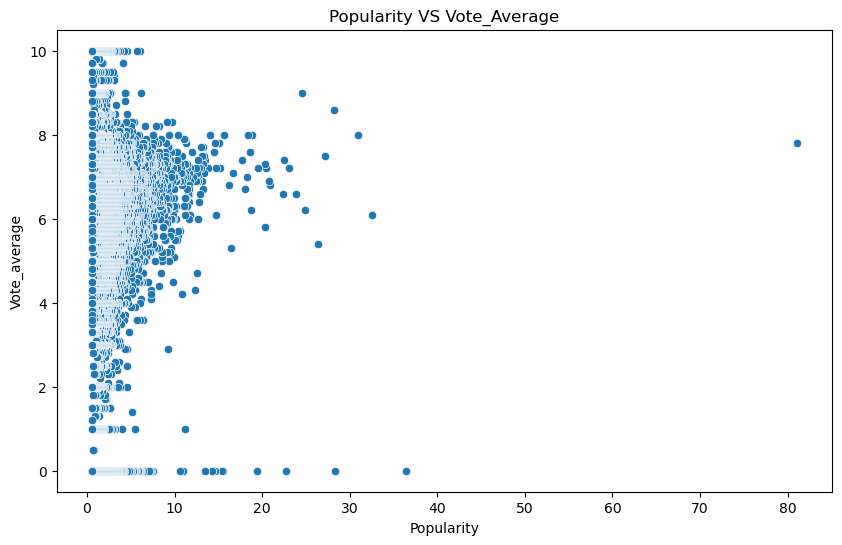

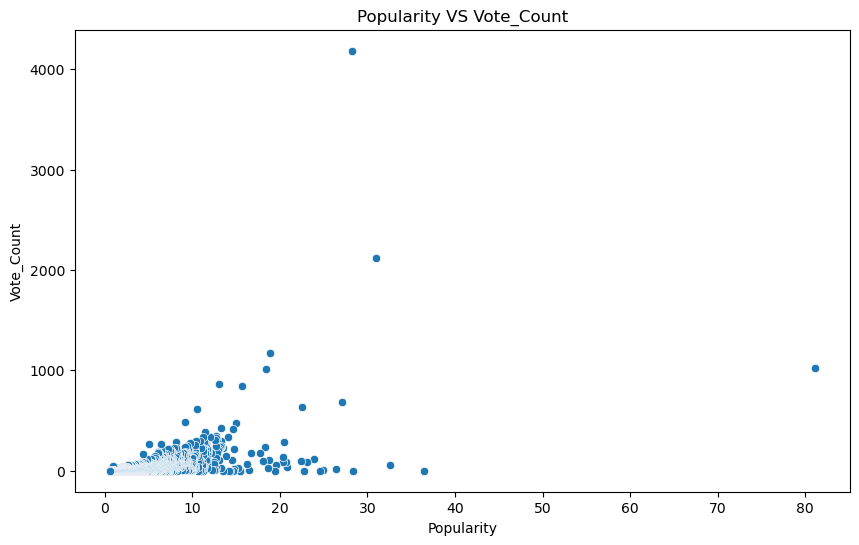

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = data, x = 'popularity',y = 'vote_average')
plt.title("Popularity VS Vote_Average")
plt.xlabel('Popularity')
plt.ylabel('Vote_average')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data = data, x = 'popularity',y = 'vote_count')
plt.title("Popularity VS Vote_Count")
plt.xlabel('Popularity')
plt.ylabel('Vote_Count')
plt.show()

## Histogram: Vote Average Distribution and Vote Count Distribution

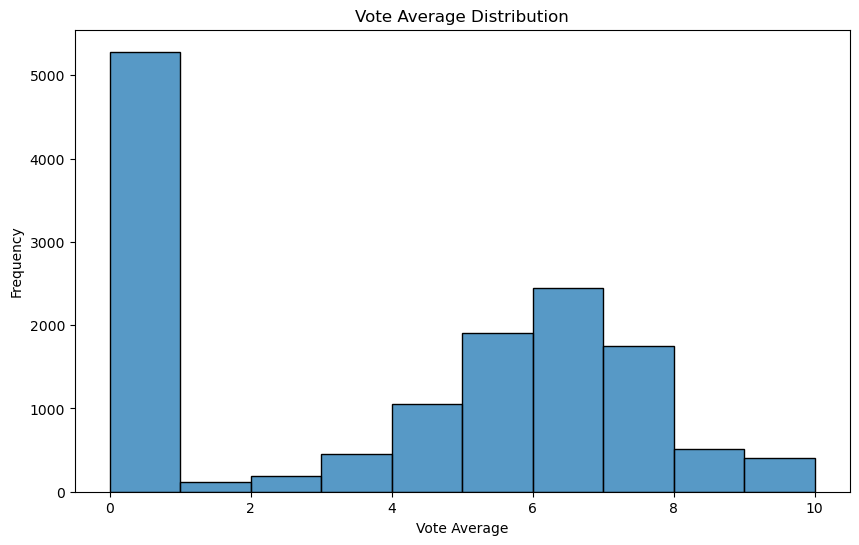

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x ='vote_average',bins = 10)
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


# plt.figure(figsize=(10,6))
# sns.histplot(data=data, y ='vote_count',bins =2)
# plt.title('Vote Count Distribution')
# plt.xlabel('Vote Count')
# plt.ylabel('Frequency')
# plt.show()

# their is no need for creating vote count distribution because its linear

## Temporal Analysis:
Explore how movie popularity has evolved over time by analyzing the relationship between release year and popularity. line plot to visualize trends

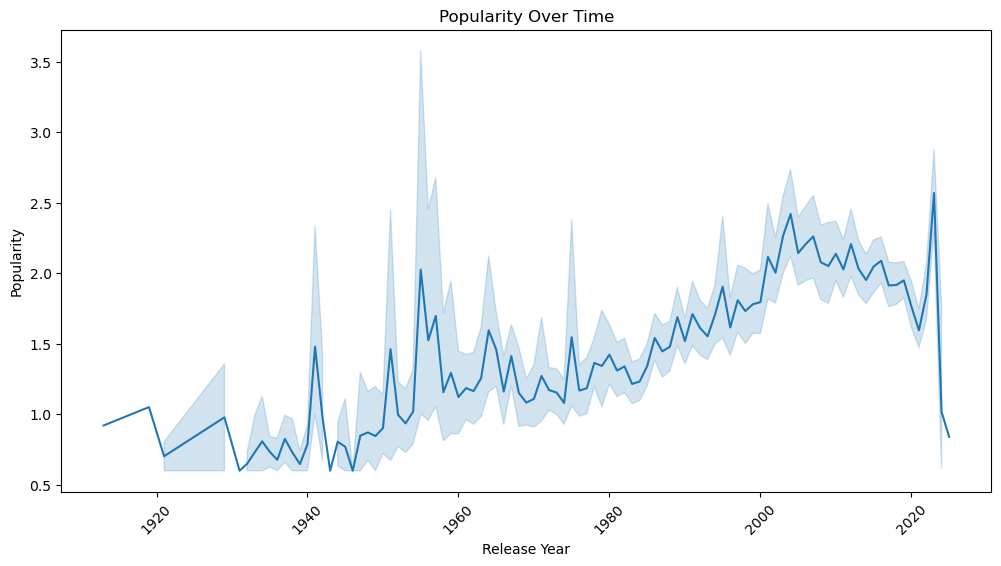

In [103]:
# Line plot: Popularity over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='release_year', y='popularity')
plt.title('Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()

## Genre Analysis:
Investigate how different genres impact movie popularity. bar plots  to compare popularity across different genres.

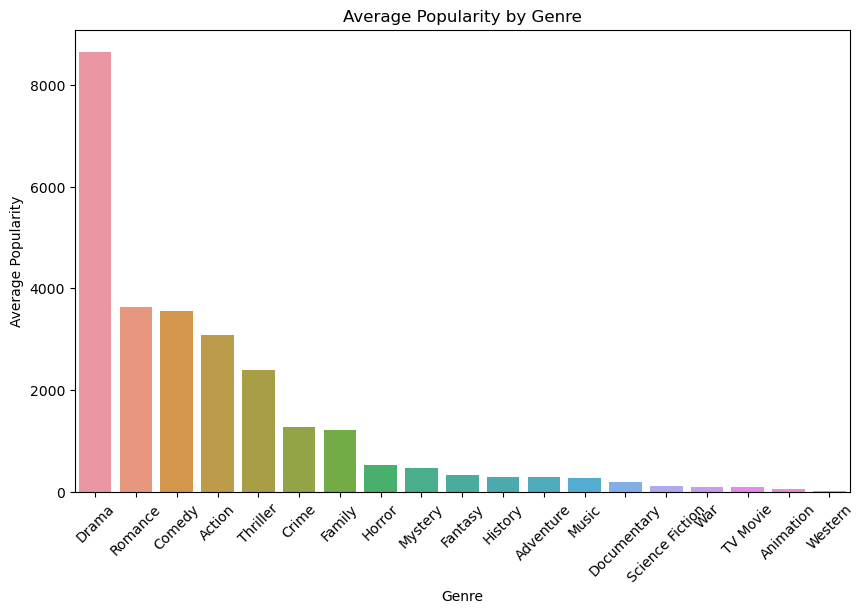

In [104]:
# Extracting genres and splitting them into separate rows
genre_data = data['genres'].str.split(', ').explode()
#Average Popularity by genre

plt.figure(figsize = (10,6))
sns.barplot(data=genre_data.value_counts().reset_index(), x='index', y='genres')
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.show()

## Highly/AVG Rated and Popular Movies:
Identify movies that are both highly rated and popular.scatter plot to visualize their distribution.

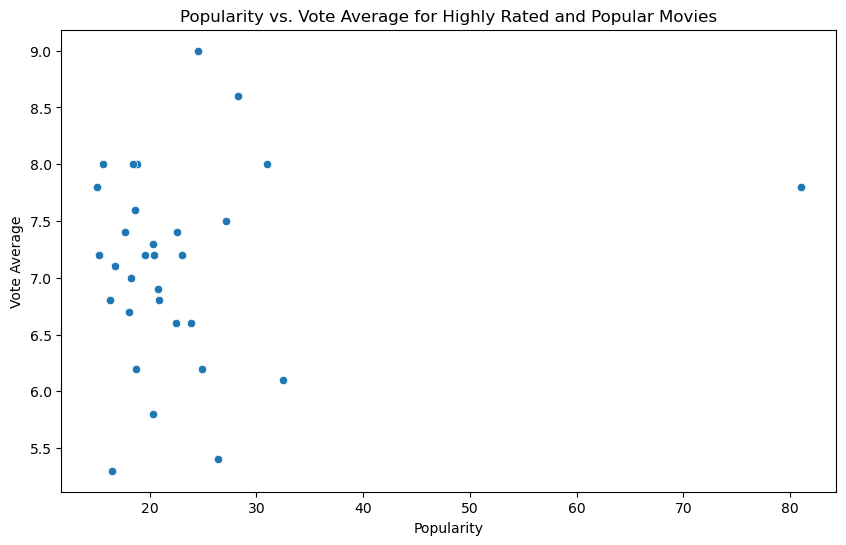

In [110]:
# Scatter plot: Popularity vs. Vote Average for Highly Rated Movies
highly_rated_popular = data[(data['vote_average'] >= 4.0) & (data['popularity'] >= 15)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=highly_rated_popular, x='popularity', y='vote_average')
plt.title('Popularity vs. Vote Average for Highly Rated and Popular Movies')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

## Release Year Distribution:
Analyze the distribution of movie releases over different years.

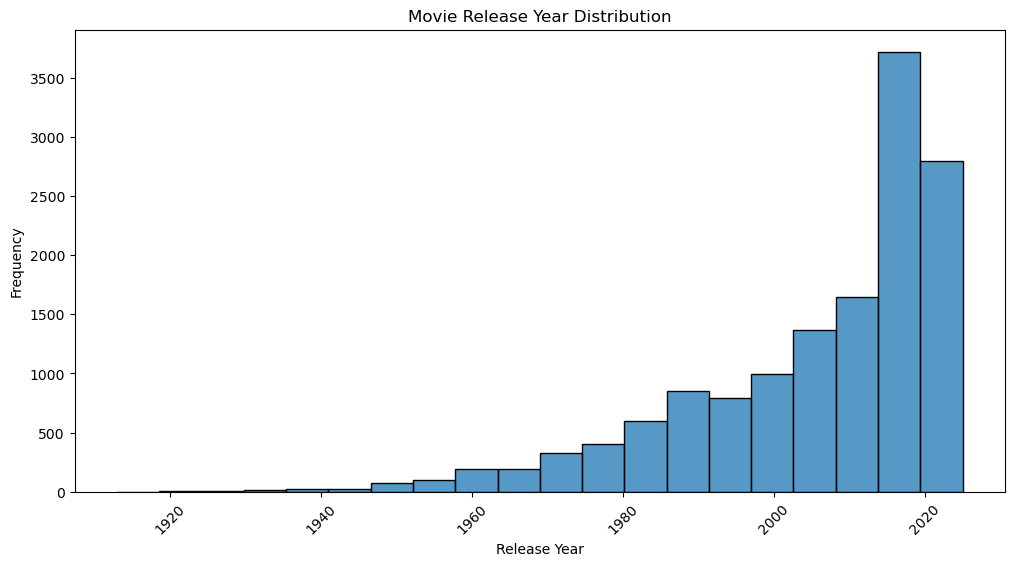

In [118]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='release_year', bins=20)
plt.title('Movie Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Heatmap:
 correlation matrix between numerical features using a heatmap.

/tmp/ipykernel_32/2062426595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)


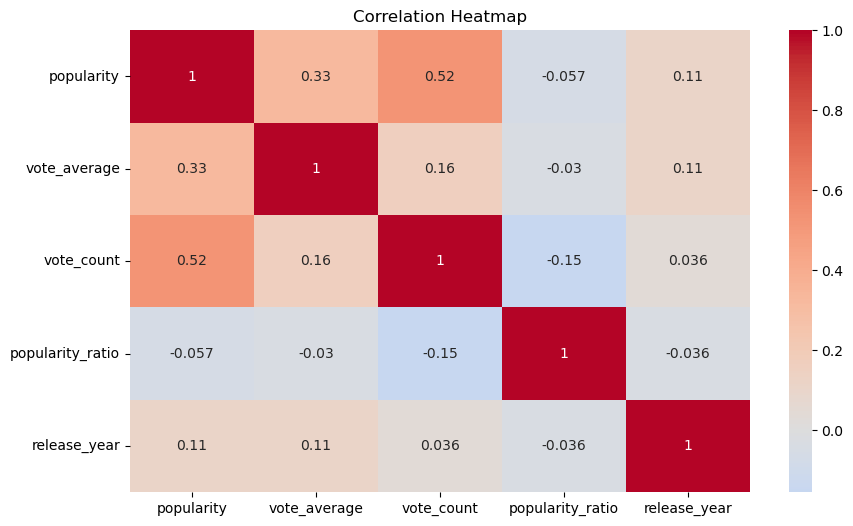

In [120]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## Bar Plot of Original Languages:
 distribution of movies across different original languages.

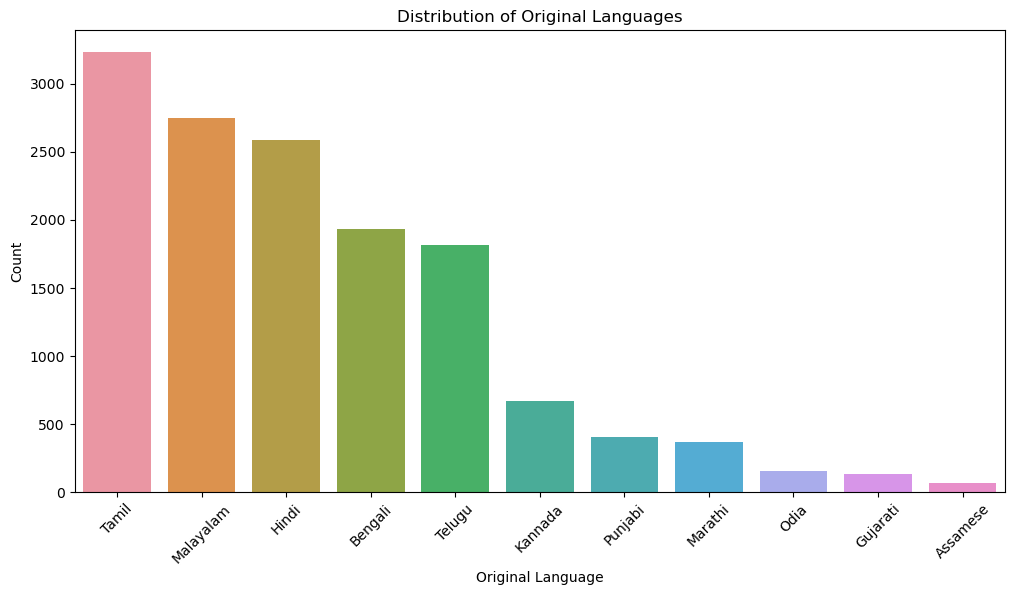

In [122]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='original_language', order=data['original_language'].value_counts().index)
plt.title('Distribution of Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

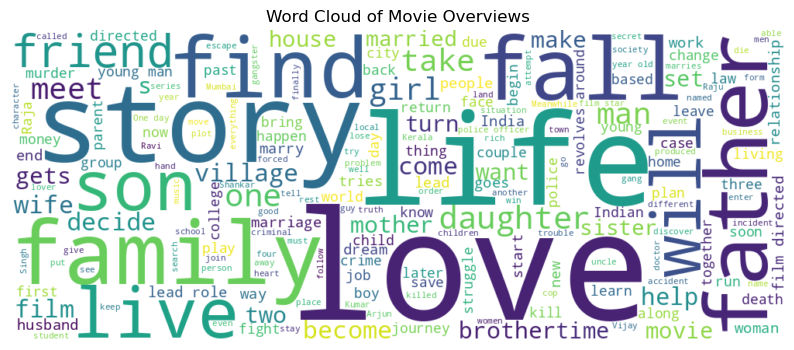

In [113]:
# from wordcloud import WorldCloud

#combine all overview into single string
all_overview = ' '.join(data['overview'])

#generate a word cloud
wordcloud = WordCloud(width = 1000, height = 400, background_color = 'white').generate(all_overview)

#display the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.title('Word Cloud of Movie Overviews')
plt.axis('off')
plt.show()

# MODEL (SIMPLE REGRESSION MODEL)

 a simple linear regression model to predict vote averages based on the 'popularity' and 'vote_count' features in your dataset. We'll use the scikit-learn library to create and evaluate the model.

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Select Feature and target Variable

In [131]:
X = data[['popularity', 'vote_count']]
y = data['vote_average']

## Split the data into training and testing sets

In [133]:
X_train, X_test,y_train,y_test = train_test_split(X,y , test_size =0.2, random_state =42)

## Creating a linear regressor model

In [135]:
model = LinearRegression()

## Fit the model to the training data

In [136]:
model.fit(X_train, y_train)

LinearRegression()

## Make prediction on test Data

In [138]:
y_pred = model.predict(X_test)

##  Evaluate the model

In [140]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 8.607007534431196
R-squared: 0.12936488738863916


**MSE** value of approximately **8.61** means that, on average, the squared difference between the predicted and actual vote averages is around 8.61. Since vote averages are typically on a scale of 0 to 10, this MSE value might be considered relatively high. It implies that the model's predictions are, on average, not very close to the actual values.

**R2** score of approximately **0.13** means that around 13% of the variability in the vote averages can be explained by the 'popularity' and 'vote_count' predictors in the linear regression model. This indicates that the model does not account for much of the variation in the vote averages.

# Summary

here's a concise summary of the key steps and concepts discussed in this notebook:

Popularity Analysis:

* Data Loading: Load movie data containing features like title, overview, release date, popularity, vote average, and vote count.
* Data Preprocessing: Clean and handle missing values, extract release year, and calculate popularity ratio.
* Data Visualization: Create visualizations to explore relationships between variables, such as popularity, vote average, and release year.
* Regression Modeling: Develop a linear regression model to predict vote averages using popularity and vote count.
* Model Evaluation: Assess the model's performance using metrics like Mean Squared Error (MSE) and R-squared (R2) score.
* These steps collectively help you understand, analyze, and model movie data to gain insights into factors affecting movie popularity and enhance prediction accuracy.

please do consider leaving a positive rating or vote. It encourages me to continue assisting and providing valuable information. If you have any more questions or need assistance in the future, don't hesitate to ask. Have a great day!

And Thank you for data set @DNYANESH YEOLE